**# Importanto as bibliotecas**

In [202]:
#Manipulação dos dados
import pandas as pd

#Visualização
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Avaliação do Modelo
from sklearn.metrics import r2_score

In [151]:
df = pd.read_csv("KAG_conversion_data.csv")

type (df)

pandas.core.frame.DataFrame

In [152]:
df.head() #lista por default as 5 primeiras linhas

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [153]:
#Para alterar as colunas
df.rename(columns = {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id': 'id_fb_campanha',
                     'age': 'idade', 'gender': 'genero', 'interest': 'interesse', 'Impressions': 'numero_exibicoes',
                     'Clicks': 'cliques_no_anuncio', 'Spent': 'valor_pago_anuncio', 'Total_Conversion': 'conversao',
                     'Approved_Conversion': 'compras'}, inplace = True)

In [154]:
df.tail() #referente as 5 ultimas colunas dos dados 

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [155]:
#saber quais colunas eu tenho
df.columns

Index(['id_anuncio', 'id_campanha', 'id_fb_campanha', 'idade', 'genero',
       'interesse', 'numero_exibicoes', 'cliques_no_anuncio',
       'valor_pago_anuncio', 'conversao', 'compras'],
      dtype='object')

In [156]:
df.describe()

,id_anuncio,id_campanha,id_fb_campanha,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [157]:
df.describe(include="all")

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
count,1.143000e+03,1143.000000,1143.000000,1143,1143,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
unique,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,30-34,M,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,426,592,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.872611e+05,1067.382327,133783.989501,NaN,NaN,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,NaN,NaN,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,NaN,NaN,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,NaN,NaN,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,NaN,NaN,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,NaN,NaN,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000


In [158]:
df.isnull().sum()

id_anuncio            0
id_campanha           0
id_fb_campanha        0
idade                 0
genero                0
interesse             0
numero_exibicoes      0
cliques_no_anuncio    0
valor_pago_anuncio    0
conversao             0
compras               0
dtype: int64

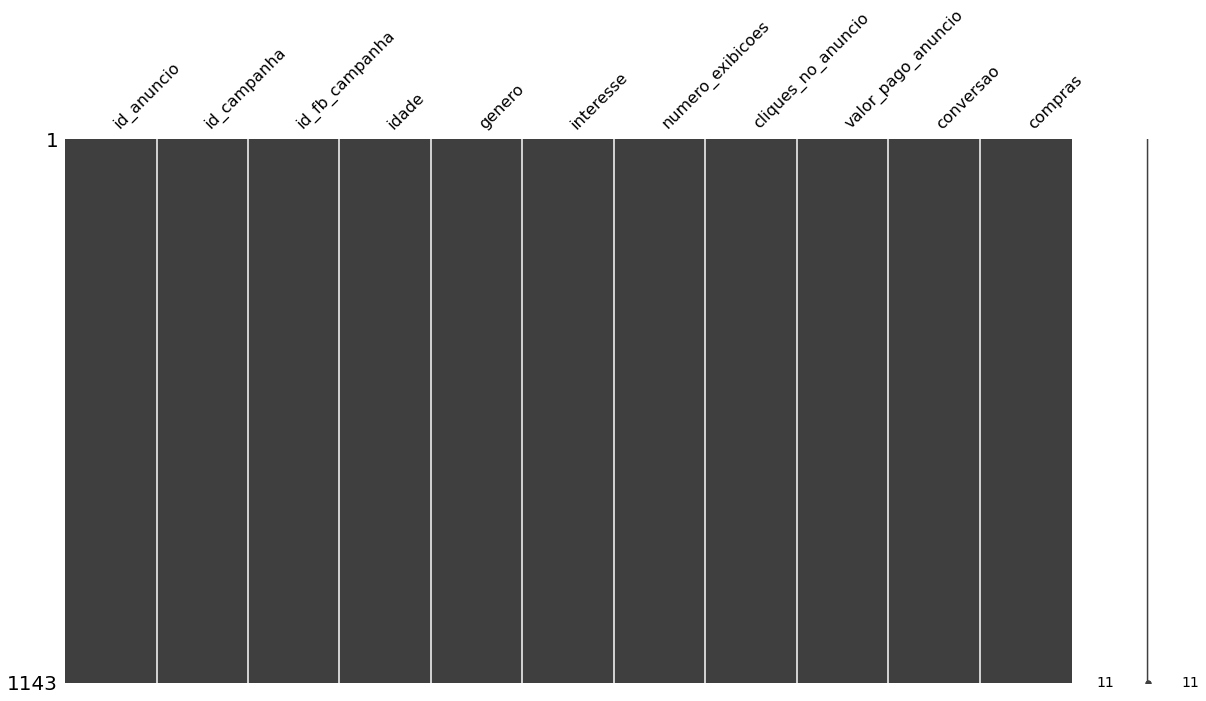

In [159]:
missingno.matrix(df,figsize=(20,10))

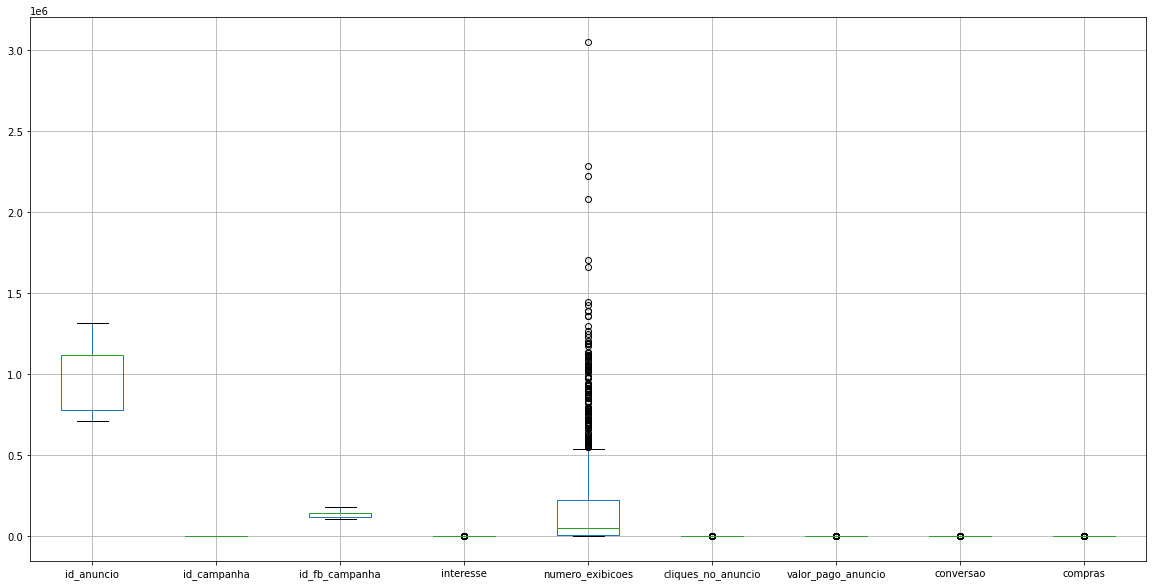

In [160]:
plt.figure(figsize=(20,10)) #essa formula serve para ver se temos numeros discrepantes 
df.boxplot()
plt.show()


In [161]:
#saber se a informação está duplicada
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras


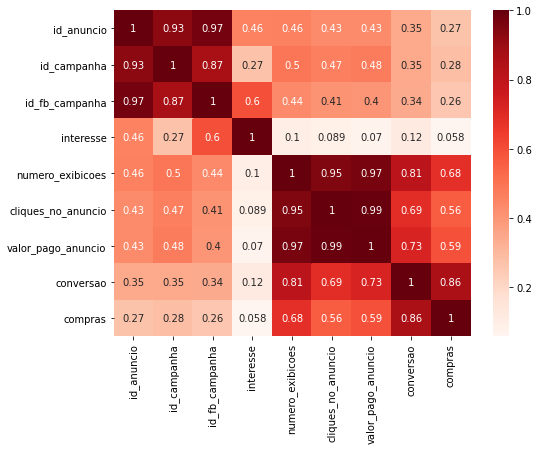

In [162]:
#saber qual a correlação entre as informações (matriz de correlação)
plt.figure(figsize=(8,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()


In [163]:
#avaliando as features (colunas) analinsado quantas campanhas tem no volume de dados, por exemplo
df["id_campanha"].nunique()


3

In [164]:
df["id_campanha"].unique() #para descobrir quais campanhas são essas:


array([ 916,  936, 1178])

In [165]:
#mudar algum nome refernte ao numero de "id campanha"
df["id_campanha"].replace({916:"campanha_1", 936:"campanha_2",1178:"campanha_3"}, inplace=True) #renomear as campanhas

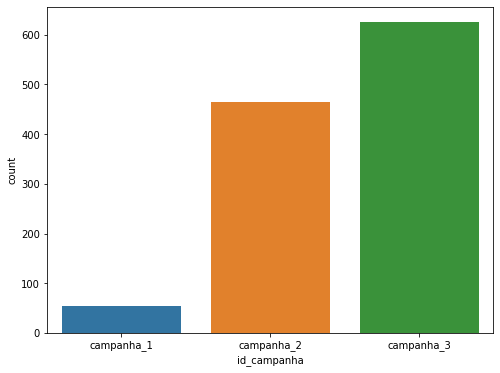

In [166]:
#quantos anuncios existem para cada campanha
plt.figure(figsize=(8,6))
sns.countplot(x="id_campanha", data=df)

Campanha 3 teve mais anúncios

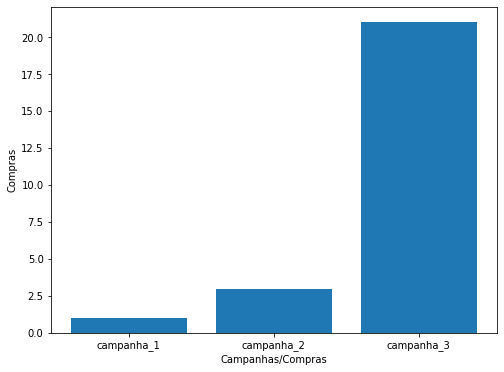

In [170]:
#Saber se realmente a campanha que mais fez anuncio foi a que mais vendeu:
plt.figure(figsize=(8,6))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras") #serve para nomear a coluna
plt.xlabel("Campanhas/Compras") #serve para nomear a base
plt.show()

In [172]:
#como idade interfere nessa compra?
df["idade"].nunique() #saber quantos intervalos tenho


4

In [173]:
#saber o intervalo
df["idade"].unique()


array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

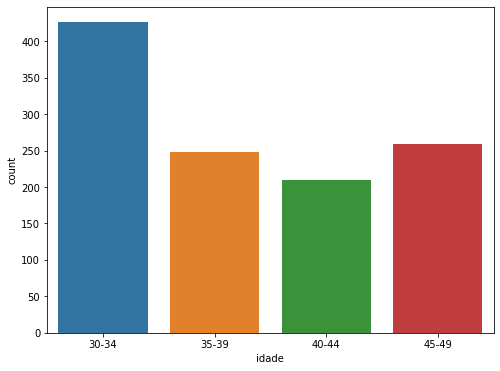

In [178]:
#qual idade mais que mais assistiu aos anuncios?
plt.figure(figsize=(8,6))
sns.countplot(x ='idade', data = df) 
plt.show() 

As pessoas que mais assistiram aos anúncios foram do intervalo "30-34".

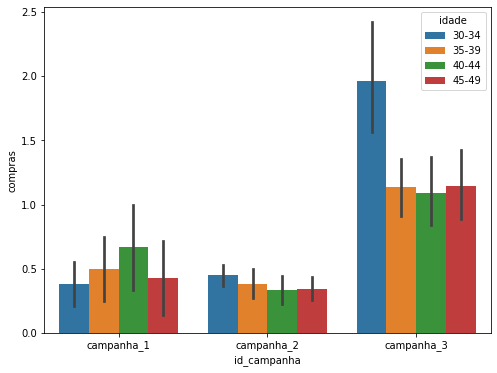

In [181]:
#Qual campanha performou melhor para as idades?
plt.figure(figsize=(8,6))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["idade"], data=tips)
plt.show()

Na campanha_3 e campanha_2 o grupo de 30-34 anos mostra mais interesse
Na campanha_1 o grupo de 40-44 anos mostra mais interesse

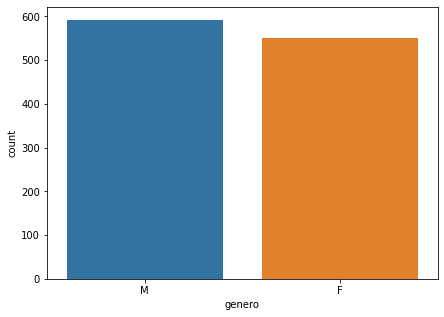

In [184]:
#genero que as pessoas desejam que os anuncios sejam mostrados
plt.figure(figsize=(7,5))
sns.countplot(x="genero", data=df)
plt.show()


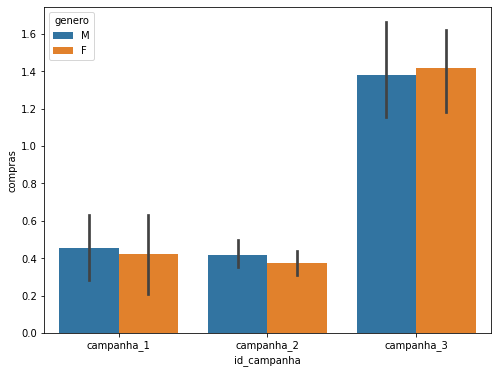

In [186]:
#qual o interesse de cada genero para cada campanha?
plt.figure(figsize=(8,6))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["genero"], data=tips)
plt.show()

In [188]:
#Modelagem/Machine Learning
df.shape #linhas e colunas que tenho dos dados

(1143, 11)

In [168]:
df.shape

(1143, 11)

In [195]:
amostra_df = df.sample(n=200) #aqui estou solicitando uma amostra de 20

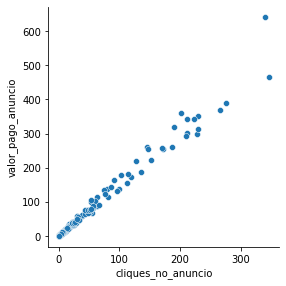

In [196]:
#Aqui mostra que a partir que eu invisto mais em pagar pelos anuncios, os cliques no anuncio também aumentam
sns.pairplot(amostra_df, x_vars=["cliques_no_anuncio"], y_vars=["valor_pago_anuncio"], height=4, kind='scatter')
plt.show()

In [197]:
#como trocar a  idade
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)

In [199]:
#trocar os generos por numeros
df = df.replace('M',1)
df = df.replace('F',0)

In [200]:
#colunas que eu quero trabalhar
X = df[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques_no_anuncio']]

In [201]:
#quero vincular o "x" acima com o valor pago por anuncio
y = df['valor_pago_anuncio']

In [203]:
#separar os dados para treino de IA e para teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32) #ele pega 30% para teste e 70% para o treino

In [205]:
X_train.head()

,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio
640,0.0012,1,21,271091,42
852,0.0011,0,24,185665,39
311,0.0013,1,29,10090,2
803,0.0014,1,29,563074,86
105,0.0014,0,10,73634,23


In [207]:
y_train.head()

640     78.040000
852     62.140001
311      2.650000
803    142.709999
105     32.980000
Name: valor_pago_anuncio, dtype: float64

In [208]:
model=LinearRegression()

In [209]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
#y = ax + b
model.coef_ #para "a"

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [212]:
model.intercept_#para "b"

-13.191111867749427

In [217]:
model.score(X_test, y_test)

0.994899077013531

In [220]:
#Qual valor que eu pagaria para estar acessar os anuncios
idade = float(input("Idade: "))
genero = int(input("Gênero: "))
interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cliques_no_anuncio = int(input("Cliques: "))

Idade: 0.0011
Gênero: 1
Interesse: 28
Exibições: 8000
Cliques: 1


In [221]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cliques_no_anuncio]])

In [222]:
print(pred) #valor que vou gastar por anuncio para cada pessoa com as especificações acima

[1.47020066]


In [169]:
#informações sobre os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_anuncio          1143 non-null   int64  
 1   id_campanha         1143 non-null   object 
 2   id_fb_campanha      1143 non-null   int64  
 3   idade               1143 non-null   object 
 4   genero              1143 non-null   object 
 5   interesse           1143 non-null   int64  
 6   numero_exibicoes    1143 non-null   int64  
 7   cliques_no_anuncio  1143 non-null   int64  
 8   valor_pago_anuncio  1143 non-null   float64
 9   conversao           1143 non-null   int64  
 10  compras             1143 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 98.4+ KB


1. ad_id - ID único para cada anúncio
2. xyzcampaignid - ID associado a cada campanha publicitária da empresa XYZ
3. fbcampaignid - ID associado a como o Facebook rastreia cada campanha.
4. age - idade da pessoa a quem o anúncio é mostrado.
5. gender - sexo da pessoa que deseja que o anúncio seja mostrado
6. interest - código que especifica a categoria à qual pertence o 
7. interesse da pessoa (os interesses são mencionados no perfil público da pessoa no Facebook)
8. Impression - o número de vezes que o anúncio foi mostrado.
9. Clicks - número de cliques nesse anúncio.
10. Spent - Valor pago pela empresa xyz ao Facebook, para exibir aquele anúncio.
11. Total conversion - Número total de pessoas que fizeram perguntas sobre o produto depois de ver o anúncio.
12. Approved conversion - Número total de pessoas que compraram o produto depois de ver o anúncio.